In [ ]:
import pandas as pd
from pandas_datareader import data as web
import datetime

start = datetime.datetime(2016,1,1)
end = datetime.date.today()

nvidia = web.DataReader("NVDA", "robinhood", start, end)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

%pylab inline

pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots


In [ ]:
nvidia['Close'].plot(grid = True)
plt.show()

In [ ]:
daily_close = nvidia[['Adj Close']]
daily_pct_change = daily_close.pct_change()
daily_pct_change.fillna(0, inplace=True)

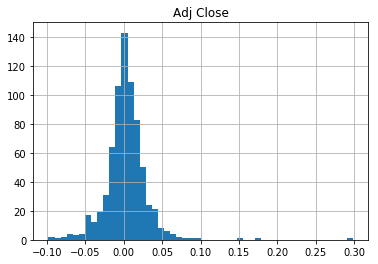

In [36]:
daily_pct_change.hist(bins=50)
plt.show()

In [37]:
print(daily_pct_change.describe())

        Adj Close
count  721.000000
mean     0.002947
std      0.027214
min     -0.097937
25%     -0.008459
50%      0.002393
75%      0.015536
max      0.298067


In [40]:
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_monthly_return = cum_daily_return.resample('M').mean()

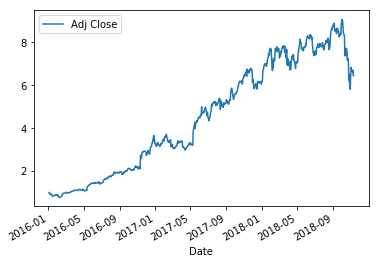

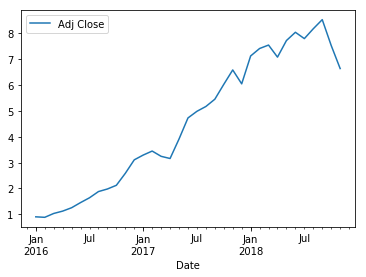

In [41]:
cum_daily_return.plot()
plt.show()

cum_monthly_return.plot()
plt.show()

In [52]:
# Load a bunch of tickers into a dataframe at once
def getTickersData(tickers, start, end):
  return pd.concat(
      [web.get_data_yahoo(ticker, start=start, end=end) for ticker in tickers],
      keys=tickers,
      names=['Ticker', 'Date']
  )

today = datetime.date.today()
def getDayNYearsAgo(n=1):
    days_per_year = 365.24
    return today - datetime.timedelta(days=(n*days_per_year))

tickers = ['AAPL', 'MSFT', 'NVDA', 'SHOP', 'CRM']
start = getDayNYearsAgo()
end = today
all_data = getTickersData(tickers, start, end)
all_data.head()


High         Low        Open       Close      Volume  \
Ticker Date                                                                     
AAPL   2017-11-13  174.500000  173.399994  173.500000  173.970001  16982100.0   
       2017-11-14  173.479996  171.179993  173.039993  171.339996  24782500.0   
       2017-11-15  170.320007  168.380005  169.970001  169.080002  29158100.0   
       2017-11-16  171.869995  170.300003  171.179993  171.100006  23637500.0   
       2017-11-17  171.389999  169.639999  171.039993  170.149994  21899500.0   

                    Adj Close  
Ticker Date                    
AAPL   2017-11-13  171.396790  
       2017-11-14  168.805664  
       2017-11-15  166.579117  
       2017-11-16  168.569260  
       2017-11-17  167.633301

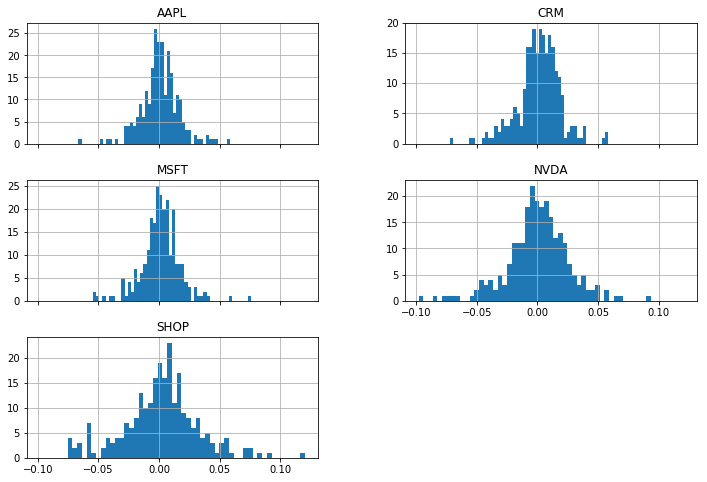

In [53]:
# Isolate the `Adj Close` values and transform the DataFrame
daily_close_px = all_data[['Adj Close']].reset_index().pivot('Date', 'Ticker', 'Adj Close')
# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()
# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12, 8))
plt.show()

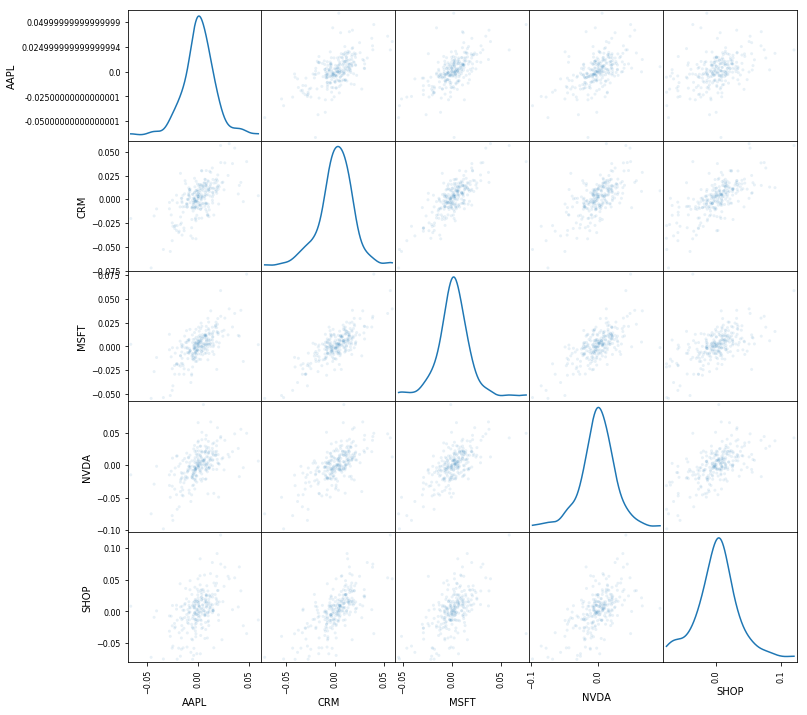

In [55]:
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))
plt.show()

In [56]:
adj_close_px = nvidia['Adj Close']
move_avg = adj_close_px.rolling(window=40).mean()
move_avg[-10:]

Date
2018-10-29    256.82775
2018-10-30    254.81025
2018-10-31    253.12050
2018-11-01    251.75525
2018-11-02    250.33175
2018-11-05    248.75775
2018-11-06    247.21425
2018-11-07    245.85400
2018-11-08    244.22025
2018-11-09    242.45125
Name: Adj Close, dtype: float64

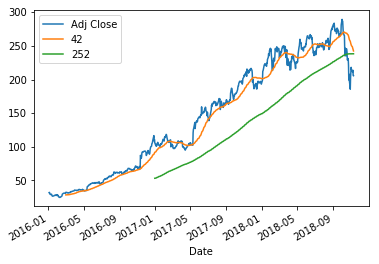

In [57]:
nvidia['42'] = adj_close_px.rolling(window=40).mean()
nvidia['252'] = adj_close_px.rolling(window=252).mean()

nvidia[['Adj Close', '42', '252']].plot()
plt.show()

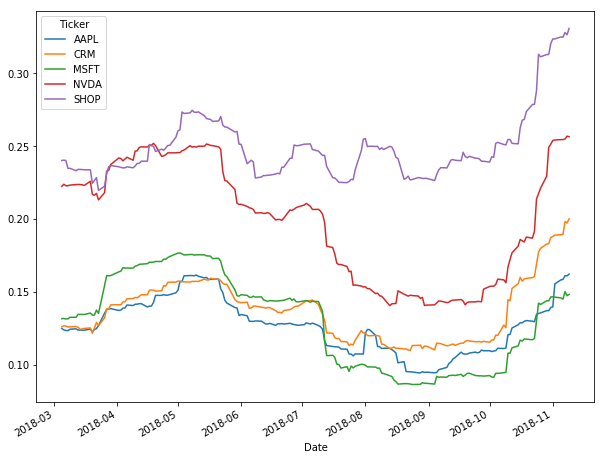

In [58]:
min_periods = 75

vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods)

vol.plot(figsize=(10,8))
plt.show()